In [190]:
import matplotlib.pyplot as plt
import math

def sin_series_gen(freq,amplitude,dt,t_series):
    return [math.sin((dt * freq * 2 * math.pi * amplitude) * t_series[i] / dt) for i in range(len(t_series))]

def unit_step_series_gen(t0,dt,t_series):
    return [1 if t_series[i] >= -t0 else 0 for i in range(len(t_series))]

def time_series_gen(duration):
    dt = duration / 1000 * 1.25
    series = [dt * i for i in range(-250,1000,1)]
    return dt,series

def sum_series(*args : list,scale_down = True):
    argLen = len(args[0])
    tempSum = 0
    sum : list = []
    for index in range(argLen):
        for argIndex in range(len(args)):
            tempSum += args[argIndex][index]
            # print(tempSum)
        sum.append(tempSum * ((1 / len(args)) if scale_down == True else 1))
        tempSum = 0
    return sum

def sub_series(*args : list,scale_down = True):
    argLen = len(args[0])
    tempSub = 0
    sub : list = []
    for index in range(argLen):
        for argIndex in range(1,len(args)):
            tempSub = args[0][index] - args[argIndex][index]
            sub.append(tempSub * ((1 / len(args)) if scale_down == True else 1))
            # print(tempSub)
        # tempSub = 1
    return sub

def multi_series(*args : list,scale_down = True):
    argLen = len(args[0])
    tempMulti = 1
    sum : list = []
    for index in range(argLen):
        for argIndex in range(len(args)):
            tempMulti *= args[argIndex][index] 
        sum.append(tempMulti * ((1 / len(args)) if (scale_down == True) else 1))
        tempMulti = 1
    return sum


In [191]:
import numpy as np
def dft(x):
  N, yr, yi = len(x), [], []
  for k in range(N):
    real, imag = 0, 0
    for n in range(N):
      theta = -k * (2 * math.pi) * (float(n) / N)
      real += x[n] * math.cos(theta)
      imag += x[n] * math.sin(theta)
    yr.append(real / N)
    yi.append(imag / N)
  return yr, yi

def my_dft(arr : list):
    length = len(arr)
    result = 0
    output = []
    for j in range(length):
      for index,member in enumerate(arr):
          result += member * np.exp(-1j*2*np.pi*index*j / length)
      output.append(result)
      result = 0
      
    return output

dt, t_series = time_series_gen(5)
sin_series_1 = sin_series_gen(1,1,dt,t_series)
sin_series_5 = sin_series_gen(50,0.5,dt,t_series)
sin_series_10 = sin_series_gen(100,0.2,dt,t_series)
sin_sum = sum_series(sin_series_1,sin_series_5,sin_series_10)

step1 = unit_step_series_gen(0,dt,t_series)
step2 = unit_step_series_gen(-3,dt,t_series)
step_sub = sub_series(step1,step2,scale_down=False)

# -(e^-st / s)
# -e^-jwt
# fig2,ax2 = plt.subplots()

# ax2.plot(t_series,step_sub)

# fig,ax = plt.subplots(3)
# ax.plot(t_series,step_sub)
# ax[0].plot(t_series,step1)
# ax[1].plot(t_series,step2)
x = my_dft(sin_sum)

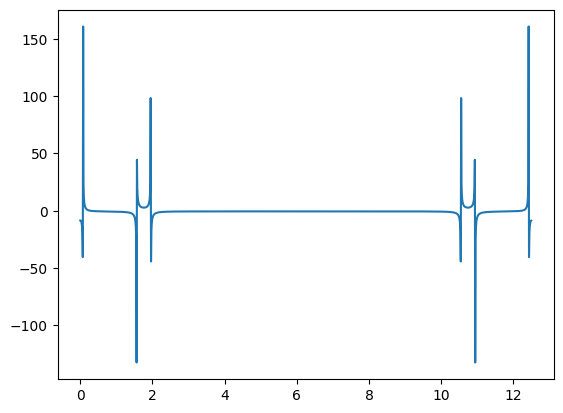

In [193]:
fig3,ax3 = plt.subplots()
y = x[500:]
ax3.plot([i*0.01 for i in range(len(x))],x)

In [ ]:
#DFT Test
import numpy as np
def dft(arr : list,inputIndex):
    length = len(arr)
    result = 0
    for index,member in enumerate(arr):
        # print(index,member)
        result += member * np.exp(-1j*2*np.pi*index*inputIndex / length)
    return result

arr = [0,1,2,3]
for i,mem in enumerate(arr):
    print(dft(arr,i))
    
    